In [ ]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np
from google.colab import drive
import sklearn as sc
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

drive.mount("/content/drive")
Dataset1 = pd.read_csv("/content/drive/MyDrive/BTC-USD.csv")

Mounted at /content/drive


In [ ]:
Dataset1['Date'] = pd.to_datetime(Dataset1['Date'])
Dataset1['Year'] = Dataset1['Date'].dt.year
Dataset1 = Dataset1.dropna(subset=['Close'])
median = Dataset1['Close'].median()
Dataset1['Close'] = Dataset1['Close'].fillna(median)
imputer = SimpleImputer(strategy='median')
X = Dataset1[['Year']]
y = Dataset1['Close']
X = imputer.fit_transform(X)
y = imputer.fit_transform(y.values.reshape(-1,1))



<ipython-input-5-b8303b60a165>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1['Close'] = Dataset1['Close'].fillna(median)


In [ ]:
Dataset1

,Date,Open,High,Low,Close,Volume,Year
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,3.627890e+07,2016
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,3.009660e+07,2016
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,3.963380e+07,2016
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,3.847750e+07,2016
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,3.452260e+07,2016
...,...,...,...,...,...,...,...
2146,2021-11-16,63721.195313,63721.195313,59016.335938,60161.246094,4.684434e+10,2021
2147,2021-11-17,60139.621094,60823.609375,58515.410156,60368.011719,3.917839e+10,2021
2148,2021-11-18,60360.136719,60948.500000,56550.792969,56942.136719,4.138834e+10,2021
2149,2021-11-19,56896.128906,58351.113281,55705.179688,58119.578125,3.870241e+10,2021


##**Abstract:**

Bitcoin es una moneda digital descentralizada creada en enero de 2009. Sigue las ideas expuestas en un Whitepaper por el misterioso y seudónimo Satoshi Nakamoto.12 La identidad de la persona o personas que crearon la tecnología sigue siendo un misterio. Bitcoin ofrece la promesa de tarifas de transacción más bajas que los mecanismos tradicionales de pago en línea y, a diferencia de las monedas emitidas por los gobiernos, es operado por una autoridad descentralizada.
En este Dataset, podemos apreciar diferentes datos de este criptoactivo con el correr de los años. Buscamos también, detectar tendencias, cambios y patrones a través de los años.

Problema comercial:

¿solución o problema?
Demasiado volátil. Estructuralmente el bitcoin es demasiado volátil para que se consolide como sistema de transacción o activo de inversión estable. Los movimientos de doble dígito dentro de la misma sesión han sido una constante durante los últimos meses, algo que es un problema para los particulares pero aún más para cualquier negocio que tiene que planificar con antelación y que, en muchos casos, trabaja con márgenes reducidos. Para que el Bitcoin pueda ser una referencia, no puede estar sujeto a subidas y bajadas en su cotización de tan tremenda volatilidad.

Ineficiente. El consumo energético procedente de la minería de bitcoin ya alcanza niveles tan elevados como el de toda la energía que se consume en países como Hungría, Qatar o Nueva Zelanda.


Limitación del sistema. Si no se extrae el bitcoin, las transacciones no se aprueban y no se producen nuevos bitcoins. Hasta el 13 de enero se han extraído 16.800.000 bitcoins acercándose a los máximos históricos registrados en 21 millones de monedas extraídas. Cuando se hayan extraído todos los bitcoins, el suministro ya no podrá crecer más.

Elevados costes de transacción. Uno de los principales problemas a los que se enfrenta el bitcoin son los elevados costes de una simple transacción. 

Las elevadísimas tasas de transacción están cambiando fundamentalmente el bitcoin. Originalmente, uno de los mayores atractivos comerciales del bitcoin era que los pagos de las transacciones eran rápidas, cómodos y, lo más importante, baratos.

Desregulación. Una de las características particulares de la criptodivisa es su naturaleza descentralizada. Ningún banco central la apoya ni las operaciones pueden ser rastreadas.

##**Propuesta:**

Nuestra investigación sobre el Bitcoin aborda las tendencias, cambios y sus patrones. A partir del aumento del precio de este criptoactivo  buscamos  desarrollar un algoritmo que pudiese predecir futuros precios a partir de la información histórica brindada.

EDA:

Comenzamos con nuestro analisis exploratorio de datos (EDA) en el que intentaremos extraer de la manera mas limpia y efectiva posible la mayor informacion de nuestro dataset. Algunas de las cuestiones a ejemplificar seran las siguientes:

1-¿Con que tipo de datos estamos trabajando?

2-¿Cuenta con datos duplicados o nulos?

Gráfico 1: 

3- ¿Como es la relación entre el precio y el tiempo? 

4- ¿En que porcentaje aumentó?

Gráfico 2:

5- ¿Como es la relación entre "Highs" y "Lows"?

6- ¿Tiene una pendiente creciente o decreciente?

Gráfico 3:

7- ¿Como es la relación entre el volumen y el tiempo?

8- ¿Fue aumentando o descendiendo?

Gráfico 4

9- ¿Como se distribuyeron los mínimos en cada año?

10- ¿Como es la relación de mínimos entre los años?

Gráfico 5

11- ¿Como se distribuyeron los máximos en cada año?

12- ¿Son máximos mayores o menores?

Gráfico 6

13- ¿Como es la relación entre los años, el volumen y el precio?

14- ¿Hay alguna tendencia?

In [ ]:
Dataset1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,3.627890e+07
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,3.009660e+07
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,3.963380e+07
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,3.847750e+07
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,3.452260e+07
...,...,...,...,...,...,...,...
2146,2021-11-16,63721.195313,63721.195313,59016.335938,60161.246094,60161.246094,4.684434e+10
2147,2021-11-17,60139.621094,60823.609375,58515.410156,60368.011719,60368.011719,3.917839e+10
2148,2021-11-18,60360.136719,60948.500000,56550.792969,56942.136719,56942.136719,4.138834e+10
2149,2021-11-19,56896.128906,58351.113281,55705.179688,58119.578125,58119.578125,3.870241e+10


In [ ]:
Dataset1['Year'] = Dataset1['Year'].astype('float64')

In [ ]:
Dataset1['Year'].dtype

dtype('float64')

In [ ]:
#Tipo de datos
Dataset1.dtypes



Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
Year             float64
dtype: object

1- En su mayoría estamos trabajando con Flotantes, es decir, números brutos o que contienen decimales

In [ ]:
#Nulos:
Dataset1.isnull().sum()

Date      0
Open      4
High      4
Low       4
Close     4
Volume    4
Year      0
dtype: int64

In [ ]:
#Tamaño:
Dataset1.shape

(2151, 7)

In [ ]:
# Dropeamos Duplicados y Nulos:
Dataset1.drop_duplicates(inplace=True)
Dataset1 = Dataset1.dropna()
Dataset1.shape

(2147, 7)

**Respuestas a las preguntas planteadas en la EDA**

2- Sí, tenemos datos nulos los cuales ya fueron eliminados. No contamos duplicados

3- Con el correr del tiempo, podemos apreciar que la tendencia es alcista. Si bien no siempre se mantiene así, habiendo fluctuaciones e incluso años bajistas, la tendencia general si es alcista

4- El precio aumento en un 13000%




In [ ]:
(58137.187500*430.721008)/100

250409.08002285

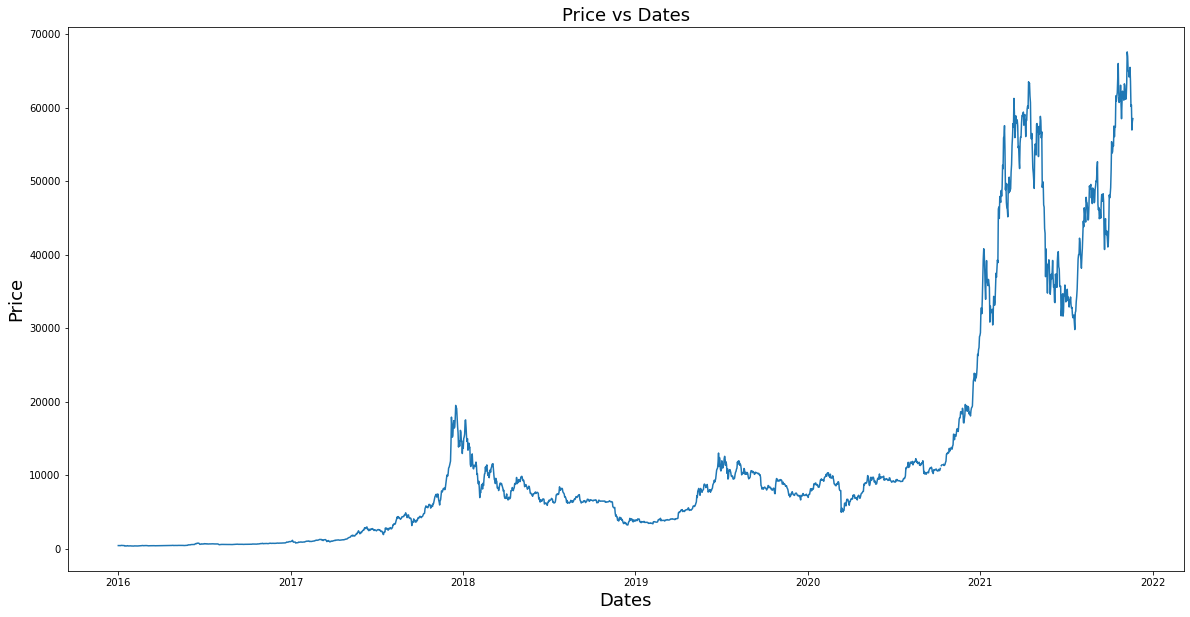

In [ ]:
#Gráfico 1

x = Dataset1['Date']
y = Dataset1['Close']

plt.figure(figsize=(20,10))

plt.xlabel('Dates', fontsize=18)
plt.ylabel('Price', fontsize=18, rotation=90)
plt.title('Price vs Dates', fontsize=18)
plt.plot(x, y)

plt.show()

5- La relación entre "Highs" Y "Lows" es creciente, siendo así que los mínimos son cada vez mayores y los máximos también.

6- La pendiente es creciente.

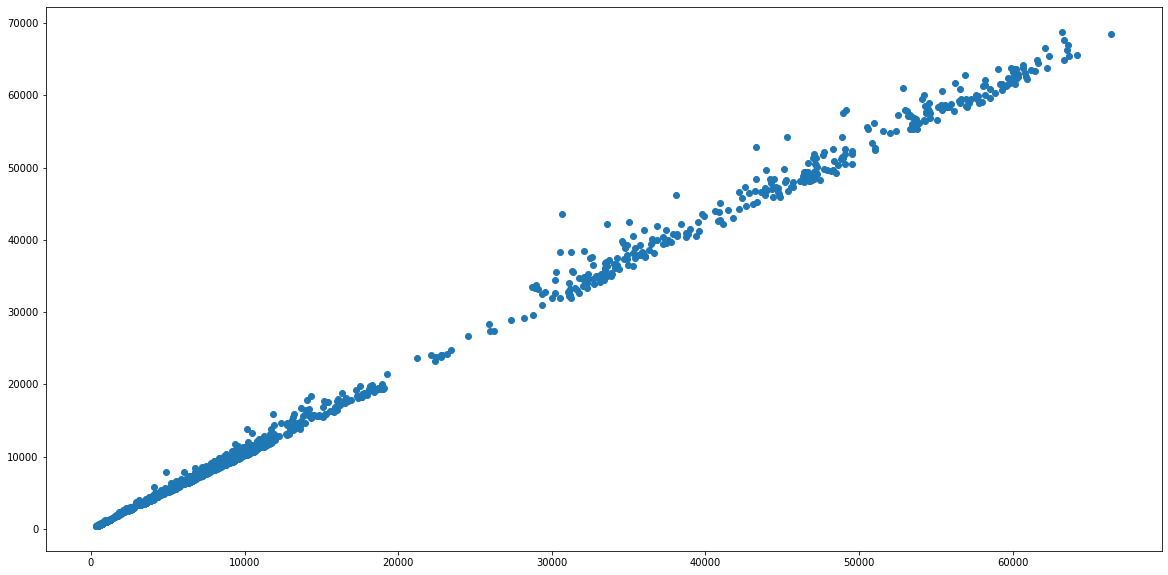

In [ ]:
#Gráfico 2

x = Dataset1['Low']
y = Dataset1['High']

plt.figure(figsize=(20,10))
plt.scatter(x,y)

7- El volumen fue en aumento con el correr del tiempo, esto se relaciona con la adopción del Bitcoin y otros factores. 

8- El volumen aumentó, teniendo su pico en 2021

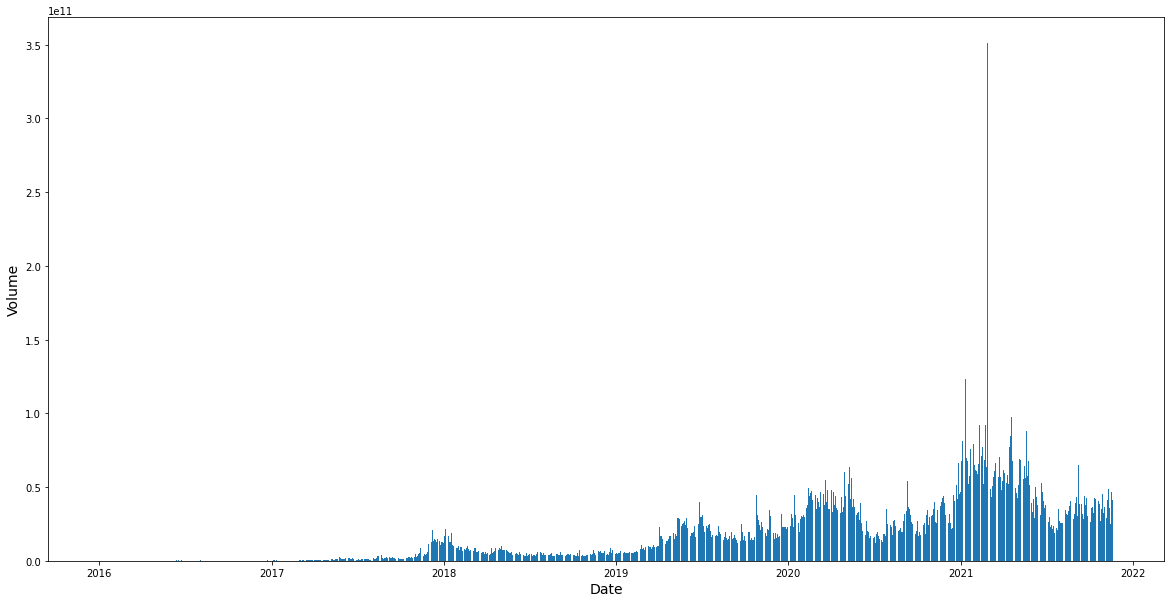

In [ ]:
#Gráfico 3

x = Dataset1['Date']
y = Dataset1['Volume']

plt.figure(figsize=(20,10))
plt.bar(x, y)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Volume", fontsize=14)

plt.show()

9- Viendo el gráfico a gran escala, los mínimos fueron cada vez mayores.

10- En 2018 y 2019 se vieron mínimos menores (en promedio) a los del 2017. Desde 2019 a 2021 los mínimos fueron cada vez mayores.

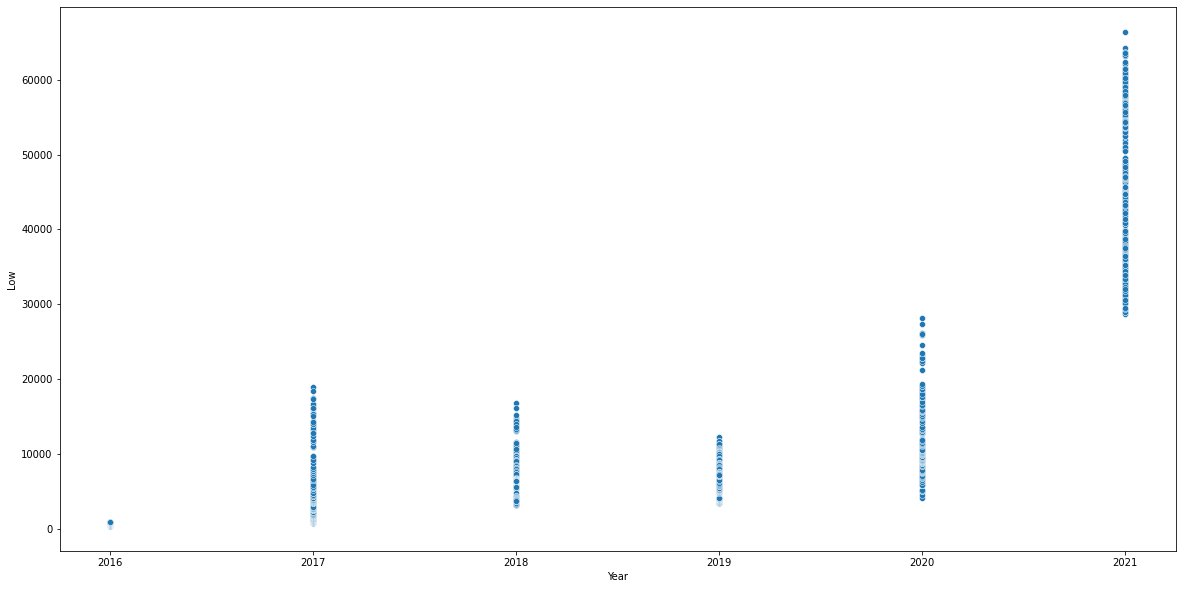

In [ ]:
#Gráfico 4

x = Dataset1['Year']
y = Dataset1['Low']


plt.figure(figsize=(20,10))
sns.scatterplot(x=x, y=y)
plt.show()

11- Los máximos aumentaron, siendo así cada vez mayores.

12- Los máximos son generalmente mayores, excepto entre 2018 y 2019 donde se mantuvieron casi constantes.

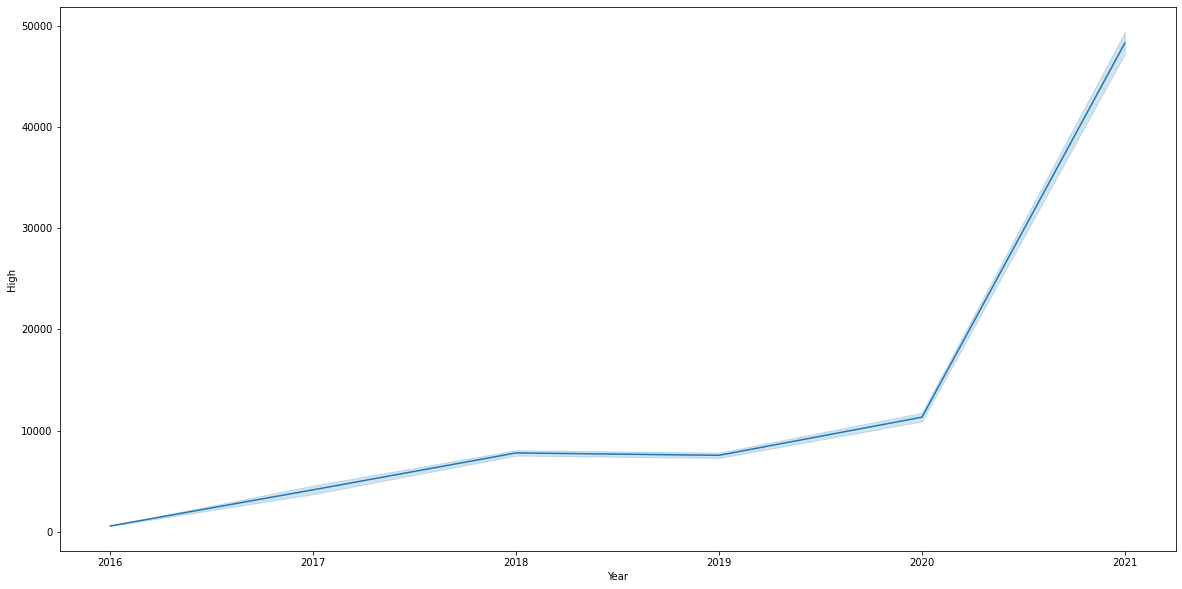

In [ ]:
#Gráfico 5

x = Dataset1['Year']
y = Dataset1['High']


plt.figure(figsize=(20,10))
sns.lineplot(x=x, y=y)
plt.show()

13- La relación entres los años, el volumen y el precio es creciente, aumentando así el volumen y el precio

14- La tendencia general es alcista

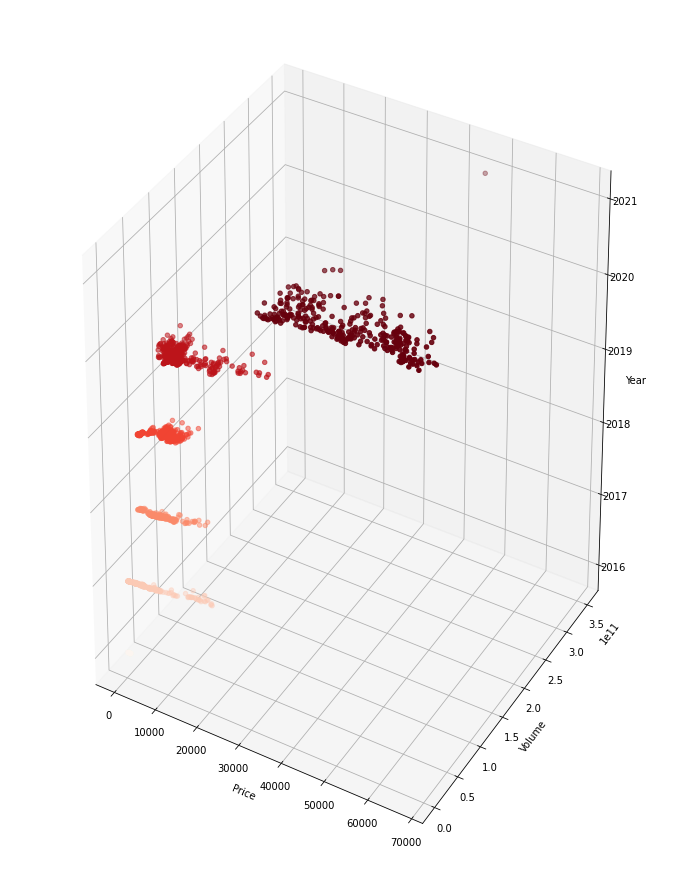

In [ ]:
#Gráfico 6

fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(111, projection='3d')


x = Dataset1['Close']
y = Dataset1['Volume']
z = Dataset1['Year']

ax.scatter(x, y, z, c=z, cmap='Reds')

ax.set_xlabel('Price')
ax.set_ylabel('Volume')
ax.set_zlabel('Year')

plt.show()

**Resolución de consigna "Evaluando modelos de ML"**

Se trata de un caso de overfitting ya que el R2 es demasiado perfecto como para ser realista, y el MSE es muy alto y no está haciendo predicciones precisas. Para poder mejorar esta situacion, deberiamos conseguir datos mas precisos.

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de regresión lineal
reg = LinearRegression()

# Ajustar el modelo utilizando los datos de entrenamiento
reg.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred = reg.predict(X_test)

# Calcular el coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print("R2: ", r2)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

# Calcular el error absoluto medio
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

# Calcular el ajuste R^2 ajustado
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R2: ", adj_r2)





R2:  0.5722459941379365
MSE:  114170407.39132372
MAE:  7815.898357164496
Adjusted R2:  0.5712465688905952
